https://pbpython.com/pandas_dtypes.html

# Introduction
When doing data analysis, it is important to make sure you are using the correct data types; otherwise you may get unexpected results or errors. In the case of pandas, it will correctly infer data types in many cases and you can move on with your analysis without any further thought on the topic.

Despite how well pandas works, at some point in your data analysis processes, you will likely need to explicitly convert data from one type to another. This article will discuss the basic pandas data types (aka `dtypes` ), how they map to python and numpy data types and the options for converting from one pandas type to another.

# Pandas Data Types
A data type is essentially an internal construct that a programming language uses to understand how to store and manipulate data. For instance, a program needs to understand that you can add two numbers together like 5 + 10 to get 15. Or, if you have two strings such as “cat” and “hat” you could concatenate (add) them together to get “cathat.”

A possible confusing point about pandas data types is that there is some overlap between pandas, python and numpy. This table summarizes the key points:

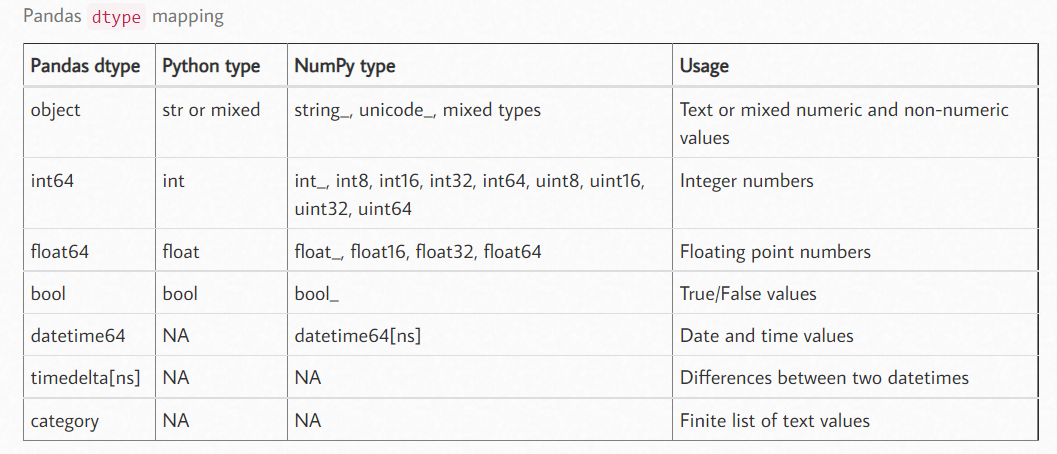

For the most part, there is no need to worry about determining if you should try to explicitly force the pandas type to a corresponding to NumPy type. Most of the time, using pandas default int64 and float64 types will work. The only reason I included in this table is that sometimes you may see the numpy types pop up on-line or in your own analysis.

For this article, I will focus on the follow pandas types:

- `object`
- `int64`
- `float64`
- `datetime64`
- `bool`

The `category` and `timedelta` types are better served in an article of their own if there is interest. However, the basic approaches outlined in this article apply to these types as well.

One other item I want to highlight is that the `object` data type can actually contain multiple different types. For instance, the a column could include integers, floats and strings which collectively are labeled as an `object` . Therefore, you may need some additional techniques to handle mixed data types in `object` columns. Refer to this article for an example the expands on the currency cleanups described below.

# Why do we care?
Data types are one of those things that you don’t tend to care about until you get an error or some unexpected results. It is also one of the first things you should check once you load a new data into pandas for further analysis.

I will use a very simple [CSV file](https://github.com/chris1610/pbpython/blob/master/data/sales_data_types.csv) to illustrate a couple of common errors you might see in pandas if the data type is not correct. Additionally, an example [notebook](https://github.com/chris1610/pbpython/blob/master/notebooks/Pandas_Data_Types.ipynb) is up on github.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("sales_data_types.csv")
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


Upon first glance, the data looks ok so we could try doing some operations to analyze the data. Let’s try adding together the 2016 and 2017 sales:

In [2]:
df['2016'] + df['2017']

0      $125,000.00$162500.00
1    $920,000.00$101,2000.00
2        $50,000.00$62500.00
3      $350,000.00$490000.00
4        $15,000.00$12750.00
dtype: object

This does not look right. We would like to get totals added together but pandas is just concatenating the two values together to create one long string. A clue to the problem is the line that says `dtype: object`. An `object` is a string in pandas so it performs a string operation instead of a mathematical one.

If we want to see what all the data types are in a dataframe, use `df.dtypes`

In [3]:
df.dtypes

Customer Number    float64
Customer Name       object
2016                object
2017                object
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

Additionally, the `df.info()` function shows even more useful info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      object 
 3   2017             5 non-null      object 
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 528.0+ bytes


After looking at the automatically assigned data types, there are several concerns:

- The `Customer Number` is a `float64` but it should be an `int64`
- The `2016` and `2017` columns are stored as objects, not numerical values such as a `float64` or `int64`
- `Percent Growth` and `Jan Units` are also stored as objects not numerical values
- We have `Month` , `Day` and `Year` columns that should be converted to `datetime64`
- The `Active` column should be a `boolean`

Until we clean up these data types, it is going to be very difficult to do much additional analysis on this data.

In order to convert data types in pandas, there are three basic options:

- Use `astype()` to force an appropriate `dtype`
- Create a custom function to convert the data
- Use pandas functions such as `to_numeric()` or `to_datetime()`


# Using the `astype()` function
The simplest way to convert a pandas column of data to a different type is to use `astype()` . For instance, to convert the `Customer Number` to an integer we can call it like this:

In [5]:
df['Customer Number'].astype('int')

0     10002
1    552278
2     23477
3     24900
4    651029
Name: Customer Number, dtype: int32

In order to actually change the customer number in the original dataframe, make sure to assign it back since the `astype()` functions returns a copy.

In [6]:
df["Customer Number"] = df['Customer Number'].astype('int')
df.dtypes

Customer Number     int32
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

And here is the new data frame with the `Customer Number` as an `integer`:

In [7]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


This all looks good and seems pretty simple. Let’s try to do the same thing to our `2016` column and convert it to a floating point number:

In [8]:
# ValueError: could not convert string to float
# df['2016'].astype('float')

In a similar manner, we can try to conver the `Jan Units` column to an integer:

In [9]:
# ValueError: invalid literal for int() with base 10
# df['Jan Units'].astype('int')

Both of these return `ValueError` exceptions which mean that the conversions did not work.

In each of the cases, the data included values that could not be interpreted as numbers. In the sales columns, the data includes a currency symbol as well as a comma in each value. In the `Jan Units` columnm the last value is “Closed” which is not a number; so we get the exception.

So far it’s not looking so good for `astype()` as a tool. We should give it one more try on the `Active` column.

In [10]:
df['Active'].astype('bool')

0    True
1    True
2    True
3    True
4    True
Name: Active, dtype: bool

At first glance, this looks ok but upon closer inspection, there is a big problem. All values were interpreted as `True` but the last customer has an Active flag of `N` so this does not seem right.

The takeaway from this section is that `astype()` will only work if:

- the data is clean and can be simply interpreted as a number
- you want to convert a numeric value to a string object

If the data has non-numeric characters or is not homogeneous, then astype() will not be a good choice for type conversion. You will need to do additional transforms for the type change to work correctly.

# Custom Conversion Functions
Since this data is a little more complex to convert, we can build a custom function that we apply to each value and convert to the appropriate data type.

For currency conversion (of this specific data set), here is a simple function we can use:

In [11]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

The code uses python’s string functions to strip out the ‘$” and ‘,’ and then convert the value to a floating point number. In this specific case, we could convert the values to integers as well but I’m choosing to use floating point in this case.

I also suspect that someone will recommend that we use a `Decimal` type for currency. This is not a native data type in pandas so I am purposely sticking with the float approach.

Also of note, is that the function converts the number to a python `float` but pandas internally converts it to a `float64`. As mentioned earlier, I recommend that you allow pandas to convert to specific size `float` or `int` as it determines appropriate. There is no need for you to try to downcast to a smaller or upcast to a larger byte size unless you really know why you need to do it.

Now, we can use the pandas `apply` function to apply this to all the values in the `2016` column.

In [12]:
df['2016'].apply(convert_currency)

0    125000.0
1    920000.0
2     50000.0
3    350000.0
4     15000.0
Name: 2016, dtype: float64

Success! All the values are showing as `float64` so we can do all the math functions we need to.

I’m sure that the more experienced readers are asking why I did not just use a lambda function? Before I answer, here is what we could do in 1 line with a `lambda` function:

In [13]:
df['2016'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

0    125000.0
1    920000.0
2     50000.0
3    350000.0
4     15000.0
Name: 2016, dtype: float64

Using `lambda` we can streamline the code into 1 line which is a perfectly valid approach. I have three main concerns with this approach:

- If you are just learning python/pandas or if someone new to python is going to be maintaining code, I think the longer function is more readable. The primary reason is that it includes comments and can be broken down into a couple of steps. lambda functions are a little more difficult for the new user to grasp.
- Secondly, if you are going to be using this function on multiple columns, I prefer not to duplicate the long lambda function.
- Finally, using a function makes it easy to clean up the data when using `read_csv()`. I will cover usage at the end of the article.

Some may also argue that other lambda-based approaches have performance improvements over the custom function. That may be true but for the purposes of teaching new users, I think the function approach is preferrable.

Here’s a full example of converting the data in both sales columns using the `convert_currency` function.

In [14]:
df['2016'] = df['2016'].apply(convert_currency)
df['2017'] = df['2017'].apply(convert_currency)

df.dtypes

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

For another example of using `lambda` vs. a function, we can look at the process for fixing the `Percent Growth` column.

Using the `lambda` :

In [15]:
df['Percent Growth'].apply(lambda x: x.replace('%', '')).astype('float') / 100

0    0.30
1    0.10
2    0.25
3    0.04
4   -0.15
Name: Percent Growth, dtype: float64

Doing the same thing with a custom function:

In [16]:
def convert_percent(val):
    """
    Convert the percentage string to an actual floating point percent
    - Remove %
    - Divide by 100 to make decimal
    """
    new_val = val.replace('%', '')
    return float(new_val) / 100

df['Percent Growth'].apply(convert_percent)

0    0.30
1    0.10
2    0.25
3    0.04
4   -0.15
Name: Percent Growth, dtype: float64

In [17]:
df['Percent Growth'] = df['Percent Growth'].apply(convert_percent)

The final custom function I will cover is using `np.where()` to convert the `Active` column to a boolean. There are several possible ways to solve this specific problem. The `np.where()` approach is useful for many types of problems so I’m choosing to include it here.

The basic idea is to use the `np.where()` function to convert all “Y” values to True and everything else assigned False

In [18]:
df["Active"] = np.where(df["Active"] == "Y", True, False)

In [19]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,False


In [20]:
df.dtypes

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active                bool
dtype: object

Whether you choose to use a `lambda` function, create a more standard python function or use another approach like `np.where()` , these approaches are very flexible and can be customized for your own unique data needs.

# Pandas helper functions
Pandas has a middle ground between the blunt `astype()` function and the more complex custom functions. These helper functions can be very useful for certain data type conversions.

If you have been following along, you’ll notice that I have not done anything with the date columns or the `Jan Units` column. Both of these can be converted simply using built in pandas functions such as `pd.to_numeric()` and `pd.to_datetime()` .

The reason the Jan Units conversion is problematic is the inclusion of a non-numeric value in the column. If we tried to use `astype()` we would get an error (as described earlier). The `pd.to_numeric()` function can handle these values more gracefully:

In [21]:
pd.to_numeric(df['Jan Units'], errors='coerce')

0    500.0
1    700.0
2    125.0
3     75.0
4      NaN
Name: Jan Units, dtype: float64

There are a couple of items of note. First, the function easily processes the data and creates a `float64` column. Additionally, it replaces the invalid “Closed” value with a `NaN` value because we passed `errors=coerce` . We can leave that value there or fill it in with a 0 using `fillna(0)` :

In [22]:
pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)

0    500.0
1    700.0
2    125.0
3     75.0
4      0.0
Name: Jan Units, dtype: float64

In [23]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0).astype(int)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,0,2,2,2014,False


The final conversion I will cover is converting the separate `Month`, `Day` and `Year` columns into a `datetime` . The pandas `pd.to_datetime()` function is quite configurable but also pretty smart by default.

In [24]:
pd.to_datetime(df[['Month', 'Day', 'Year']])

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]

In this case, the function combines the columns into a new series of the appropriate `datateime64` dtype.

In [25]:
df["Start_Date"] = pd.to_datetime(df[['Month', 'Day', 'Year']])

In [26]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Start_Date
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,True,2015-10-27
4,651029,Harbor Co,15000.0,12750.0,-0.15,0,2,2,2014,False,2014-02-02


In [27]:
df.dtypes

Customer Number             int32
Customer Name              object
2016                      float64
2017                      float64
Percent Growth            float64
Jan Units                   int32
Month                       int64
Day                         int64
Year                        int64
Active                       bool
Start_Date         datetime64[ns]
dtype: object

# Bringing it all together
The basic concepts of using `astype()` and custom functions can be included very early in the data intake process. If you have a data file that you intend to process repeatedly and it always comes in the same format, you can define the `dtype` and `converters` to be applied when reading the data. It is helpful to think of `dtype` as performing `astype()` on the data. The `converters` arguments allow you to apply functions to the various input columns similar to the approaches outlined above.

It is important to note that you can only apply a `dtype` or a `converter` function to a specified column once using this approach. If you try to apply both to the same column, then the dtype will be skipped.

Here is a streamlined example that does almost all of the conversion at the time the data is read into the dataframe:

In [28]:
df_2 = pd.read_csv("sales_data_types.csv",
                   dtype={'Customer Number': 'int'},
                   converters={'2016': convert_currency,
                               '2017': convert_currency,
                               'Percent Growth': convert_percent,
                               'Jan Units': lambda x: pd.to_numeric(x, errors='coerce'),
                               'Active': lambda x: np.where(x == "Y", True, False)
                              })

df_2.dtypes

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

In [29]:
df_2

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False


As mentioned earlier, I chose to include a `lambda` example as well as the function example for converting data. The only function that can not be applied here is the conversion of the `Month` , `Day` and `Year` columns to the corresponding `datetime` column. Still, this is a powerful convention that can help improve your data processing pipeline.

# Summary
One of the first steps when exploring a new data set is making sure the data types are set correctly. Pandas makes reasonable inferences most of the time but there are enough subtleties in data sets that it is important to know how to use the various data conversion options available in pandas. If you have any other tips you have used or if there is interest in exploring the `category` data type, feel free to comment below.